# Data Gathering

## Process
1. Understand how audio is processed
2. Determine what features to extract from the audio signal
3. Understand what each feature represents and how it is calculated
4. Write a function that reads and extracts important numeric features from audio signals from a given directory
5. Write a function that reads audio signals and extracts the mel spectrograms 

**IMPORTANT NOTE:** after downloading the data from http://marsyas.info/downloads/datasets.html, I combined all of the files into a single folder and named it "wavfiles." Make sure to do this if you are going through this notebook, and place the "wavfiles" folder in the empty "data" folder.

## Tests with Single Audio File (Toy Example)

In [3]:
def unzip_data_dir(zip_file):

    from zipfile import ZipFile

#     zip_file = "../fma_metadata.zip"

    with ZipFile(zip_file, 'r') as zip:
        # printing all the contents of the zip file
        zip.printdir()

        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall()
        print('Done!')

In [4]:
# unzip_data_dir("../fma_metadata.zip")

In [5]:
# Imports
import os
import pandas as pd
import numpy as np

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

/home/gatzoniskon/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


### Extracting an Audio Signal

A **signal** is a variation in a quantity over time. For audio, the quantity that varies is air pressure. We can represent a signal digitally by taking samples of the air pressure over time. We are left with a waveform for the signal. Librosa is a python library that allows us to extract waveforms from audio files along with several other features. This is the primary package that will be used for this project.

In [7]:
# import utils

In [8]:
# tracks = utils.load('data/fma_metadata/tracks.csv')
# genres = utils.load('data/fma_metadata/genres.csv')
# features = utils.load('data/fma_metadata/features.csv')
# echonest = utils.load('data/fma_metadata/echonest.csv')

In [9]:
# Extracting the wave, "y", and sampling rate, "sr", of the audio file
# y, sr = librosa.load('../data/blues/blues.00000.wav')
y, sr = librosa.load('../fma_data/Hip-Hop/10192.mp3', duration=30.0)
# y, sr = librosa.load(librosa.util.example_audio_file(), duration=5.0)

/home/gatzoniskon/.local/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [10]:
# Checking the shape of the wave
y.shape

(661248,)

In [11]:
# Checking the sampling rate
sr

22050

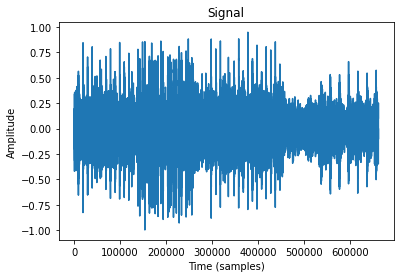

In [12]:
# Plotting the wave
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

### Fast Fourier Transform (FFT)

An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The **Fourier transform** is a mathematical formula that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a **spectrum**. The **fast Fourier transform** is an efficient way to compute the Fourier transform.

![](../images/fourier_transform.png)
citation: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

In [13]:
# Computing the fast Fourier transform on a single short time window of length 2048 (standard for music audio)
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))

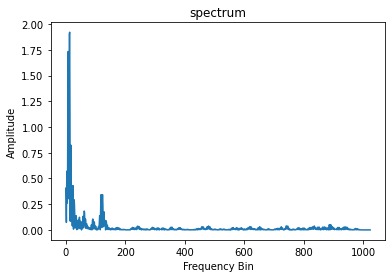

In [14]:
# Plotting the signal after applying the FFT
plt.plot(ft);
plt.title('spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

### Mel Spectrograms

**Spectrograms** are a way to visually represent a signal's loudness, or amplitude, as it varies over time at different frequencies. The horizontal axis is time, the vertical axis is frequency, and the color is amplitude. It is calculated using the fast Fourier transform on short time windows of the signal and transforming the vertical axis (frequency) to log scale and the colored axis (amplitude) to decibals. Now, what about the "mel" part? Humans are better at detecting differences in lower frequencies than higher frequencies. The **mel scale** transforms the frequency scale such that sounds at equal distances from each other also sound equal in distance. A **mel spectrogram** is a spectrogram where the frequencies are converted to the mel scale.  

/home/gatzoniskon/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/gatzoniskon/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/gatzoniskon/.local/lib/python3.6/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


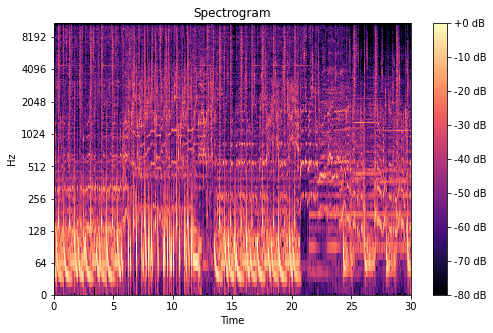

In [15]:
# Computing the spectrogram
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max) # converting to decibals

# Plotting the spectrogram
plt.figure(figsize=(8,5));
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

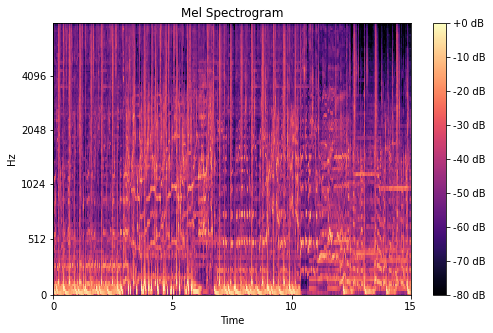

In [16]:
# Computing the mel spectrogram
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibals

# Plotting the mel spectrogram
plt.figure(figsize=(8,5))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

### Mel Frequency Cepstral Coefficients (MFCC)
MMCCs are commonly used features in the field of music information retrieval (MIR). They are tyically used to measure timbre. 

In [17]:
# Extracting mfccs from the audio signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)

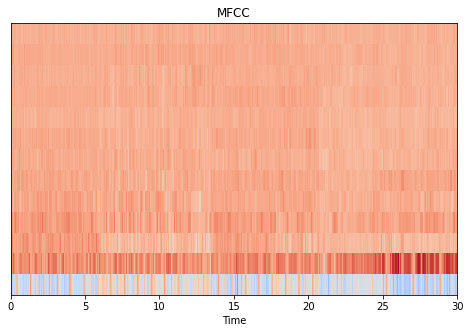

In [18]:
# Displaying the mfccs
plt.figure(figsize=(8,5));
librosa.display.specshow(mfcc, x_axis='time');
plt.title('MFCC');

In [19]:
# Scaling the mfccs
mfccscaled = np.mean(mfcc.T, axis=0)
mfccscaled

array([-127.29332  ,   72.557236 ,    1.6394058,   25.402277 ,
         12.7762375,   13.767095 ,    4.4867406,    5.7776227,
         -1.1694571,    7.8506556,    4.179059 ,    8.434986 ,
          3.0884905], dtype=float32)

In [20]:
# Creating an empty list to store sizes in
sizes = []

import warnings
warnings.filterwarnings("ignore")

# Looping through each audio file
data_dir = '../fma_data'
"""
for folder in os.scandir(data_dir):
#     print('Traversing folder ', folder.name)
    if(os.path.isdir(folder)):
        for file in os.scandir(folder):
            if(file.name.endswith('.mp3')):
                # Loading in the audio file
    #             print('Opening ', file.name)
                y, sr = librosa.core.load(str(data_dir + '/' + folder.name + '/' + file.name), duration=30.0)

                # Computing the mel spectrograms
                spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
                spect = librosa.power_to_db(spect, ref=np.max)

                # Adding the size to the list
                sizes.append(spect.shape)
    
# Checking if all sizes are the same
print(f'The sizes of all the mel spectrograms in our data set are equal: {len(set(sizes)) == 1}')

# Checking the max size
print(f'The maximum size is: {max(sizes)}')
"""

"\nfor folder in os.scandir(data_dir):\n#     print('Traversing folder ', folder.name)\n    if(os.path.isdir(folder)):\n        for file in os.scandir(folder):\n            if(file.name.endswith('.mp3')):\n                # Loading in the audio file\n    #             print('Opening ', file.name)\n                y, sr = librosa.core.load(str(data_dir + '/' + folder.name + '/' + file.name), duration=30.0)\n\n                # Computing the mel spectrograms\n                spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)\n                spect = librosa.power_to_db(spect, ref=np.max)\n\n                # Adding the size to the list\n                sizes.append(spect.shape)\n    \n# Checking if all sizes are the same\nprint(f'The sizes of all the mel spectrograms in our data set are equal: {len(set(sizes)) == 1}')\n\n# Checking the max size\nprint(f'The maximum size is: {max(sizes)}')\n"

**Note:** The Sizes are not the same, so we will have to pad the smaller arrays with zeros to make them all the same size.

In [21]:
def extract_mel_spectrogram(directory):
    '''
    This function takes in a directory of audio files in .wav format, computes the
    mel spectrogram for each audio file, reshapes them so that they are all the 
    same size, and stores them in a numpy array. 
    
    It also creates a list of genre labels and maps them to numeric values.
    
    Parameters:
    directory (int): a directory of audio files in .wav format
    
    Returns:
    X (array): array of mel spectrogram data from all audio files in the given
    directory
    y (array): array of the corresponding genre labels in numeric form
    '''
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    
    # Looping through each file in the directory
    for folder in os.scandir(directory):
        if(os.path.isdir(folder)):
            for file in os.scandir(folder):
        
                # Loading in the audio file
#                 y, sr = librosa.load(file)
                y, sr = librosa.load(str(data_dir + '/' + folder.name + '/' + file.name), duration=30.0)

                # Extracting the label and adding it to the list
                label = str(file).split('.')[0][11:]
                labels.append(label)

                # Computing the mel spectrograms
                spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
                spect = librosa.power_to_db(spect, ref=np.max)

                # Adjusting the size to be 128 x 660
                if spect.shape[1] != 660:
                    spect.resize(128,660, refcheck=False)

                # Adding the mel spectrogram to the list
                mel_specs.append(spect)
        
    # Converting the list or arrays to an array
    X = np.array(mel_specs)
    
    # Converting labels to numeric values
    labels = pd.Series(labels)
    label_dict = {
        'jazz': 1,
        'reggae': 2,
        'rock': 3,
        'blues': 4,
        'hiphop': 5,
        'country': 6,
        'metal': 7,
        'classical': 8,
        'disco': 9,
        'pop': 10
    }
    y = labels.map(label_dict)
    
    # Returning the mel spectrograms and labels
    return X, y

In [22]:
# Using the function to read and extract mel spectrograms from the GTZAN Genre Dataset audio files
#X, y = extract_mel_spectrogram('../fma_data')

**Note:** I will use this function in the first CNN notebook to gather and preprocess the data.

## Function to Read and Extract Mel Spectrograms from Audio Files

#### Checking the Size of the Mel Spectrograms
In order to feed the mel spectrogram data into a neural network, they must all be the same size, so I check that here. 

## Function to Read and Extract Mel Spectrograms from Audio Files and Convert to DataFrame

In [23]:
def make_mel_spectrogram_df(directory):
    '''
    This function takes in a directory of audio files in .wav format, computes the
    mel spectrogram for each audio file, reshapes them so that they are all the 
    same size, flattens them, and stores them in a dataframe.
    
    Genre labels are also computed and added to the dataframe.
    
    Parameters:
    directory (int): a directory of audio files in .wav format
    
    Returns:
    df (DataFrame): a dataframe of flattened mel spectrograms and their 
    corresponding genre labels
    '''
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    i = 0
    
    # Looping through each file in the directory
    for folder in os.scandir(directory):
        if(os.path.isdir(folder)):
            for file in os.scandir(folder):
                if(file.name.endswith('.mp3')):

                    # Loading in the audio file
    #                 y, sr = librosa.load(file)
                    y, sr = librosa.load(str(data_dir + '/' + folder.name + '/' + file.name), duration=30.0)

                    # Extracting the label and adding it to the list
                    label = str(folder.name)
                    labels.append(label)

                    # Computing the mel spectrograms
                    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
                    spect = librosa.power_to_db(spect, ref=np.max)

                    # Adjusting the size to be 128 x 660
                    if spect.shape[1] != 660:
                        spect.resize(128,660, refcheck=False)

                    # Flattening to fit into dataframe and adding to the list
                    spect = spect.flatten()
                    mel_specs.append(spect)
                    i += 1
                    print(i)
        
    # Converting the lists to arrays so we can stack them
    mel_specs = np.array(mel_specs)
    labels = np.array(labels).reshape(7994,1)
    
    # Create dataframe
    df = pd.DataFrame(np.hstack((mel_specs,labels)))
    
    # Returning the mel spectrograms and labels
    return df

In [24]:
# Using the above function to create a dataframe with all of the flattened mel spectrograms and genre labels
df = make_mel_spectrogram_df('../fma_data')

Pop
1
Pop
2
Pop
3
Pop
4
Pop
5
Pop
6
Pop
7
Pop
8
Pop
9
Pop
10
Pop
11
Pop
12
Pop
13
Pop
14
Pop
15
Pop
16
Pop
17
Pop
18
Pop
19
Pop
20
Pop
21
Pop
22
Pop
23
Pop
24
Pop
25
Pop
26
Pop
27
Pop
28
Pop
29
Pop
30
Pop
31
Pop
32
Pop
33
Pop
34
Pop
35
Pop
36
Pop
37
Pop
38
Pop
39
Pop
40
Pop
41
Pop
42
Pop
43
Pop
44
Pop
45
Pop
46
Pop
47
Pop
48
Pop
49
Pop
50
Pop
51
Pop
52
Pop
53
Pop
54
Pop
55
Pop
56
Pop
57
Pop
58
Pop
59
Pop
60
Pop
61
Pop
62
Pop
63
Pop
64
Pop
65
Pop
66
Pop
67
Pop
68
Pop
69
Pop
70
Pop
71
Pop
72
Pop
73
Pop
74
Pop
75
Pop
76
Pop
77
Pop
78
Pop
79
Pop
80
Pop
81
Pop
82
Pop
83
Pop
84
Pop
85
Pop
86
Pop
87
Pop
88
Pop
89
Pop
90
Pop
91
Pop
92
Pop
93
Pop
94
Pop
95
Pop
96
Pop
97
Pop
98
Pop
99
Pop
100
Pop
101
Pop
102
Pop
103
Pop
104
Pop
105
Pop
106
Pop
107
Pop
108
Pop
109
Pop
110
Pop
111
Pop
112
Pop
113
Pop
114
Pop
115
Pop
116
Pop
117
Pop
118
Pop
119
Pop
120
Pop
121
Pop
122
Pop
123
Pop
124
Pop
125
Pop
126
Pop
127
Pop
128
Pop
129
Pop
130
Pop
131
Pop
132
Pop
133
Pop
134
Pop
135
Pop
136
Pop
137
Pop
138
Pop


1017
Experimental
1018
Experimental
1019
Experimental
1020
Experimental
1021
Experimental
1022
Experimental
1023
Experimental
1024
Experimental
1025
Experimental
1026
Experimental
1027
Experimental
1028
Experimental
1029
Experimental
1030
Experimental
1031
Experimental
1032
Experimental
1033
Experimental
1034
Experimental
1035
Experimental
1036
Experimental
1037
Experimental
1038
Experimental
1039
Experimental
1040
Experimental
1041
Experimental
1042
Experimental
1043
Experimental
1044
Experimental
1045
Experimental
1046
Experimental
1047
Experimental
1048
Experimental
1049
Experimental
1050
Experimental
1051
Experimental
1052
Experimental
1053
Experimental
1054
Experimental
1055
Experimental
1056
Experimental
1057
Experimental
1058
Experimental
1059
Experimental
1060
Experimental
1061
Experimental
1062
Experimental
1063
Experimental
1064
Experimental
1065
Experimental
1066
Experimental
1067
Experimental
1068
Experimental
1069
Experimental
1070
Experimental
1071
Experimental
1072
Exper

1473
Experimental
1474
Experimental
1475
Experimental
1476
Experimental
1477
Experimental
1478
Experimental
1479
Experimental
1480
Experimental
1481
Experimental
1482
Experimental
1483
Experimental
1484
Experimental
1485
Experimental
1486
Experimental
1487
Experimental
1488
Experimental
1489
Experimental
1490
Experimental
1491
Experimental
1492
Experimental
1493
Experimental
1494
Experimental
1495
Experimental
1496
Experimental
1497
Experimental
1498
Experimental
1499
Experimental
1500
Experimental
1501
Experimental
1502
Experimental
1503
Experimental
1504
Experimental
1505
Experimental
1506
Experimental
1507
Experimental
1508
Experimental
1509
Experimental
1510
Experimental
1511
Experimental
1512
Experimental
1513
Experimental
1514
Experimental
1515
Experimental
1516
Experimental
1517
Experimental
1518
Experimental
1519
Experimental
1520
Experimental
1521
Experimental
1522
Experimental
1523
Experimental
1524
Experimental
1525
Experimental


KeyboardInterrupt: 

#### Export

In [ ]:
df.to_csv('../fma_data/genre_mel_specs.csv', index=False)

## Function to Read and Extract Numeric Features from Audio Files

In [ ]:
def extract_audio_features(directory):
    '''
    This function takes in a directory of .wav files and returns a 
    DataFrame that includes several numeric features of the audio file 
    as well as the corresponding genre labels.
    
    The numeric features incuded are the first 13 mfccs, zero-crossing rate, 
    spectral centroid, and spectral rolloff.
    
    Parameters:
    directory (int): a directory of audio files in .wav format
    
    Returns:
    df (DataFrame): a table of audio files that includes several numeric features 
    and genre labels.
    '''
    
    # Creating an empty list to store all file names
    files = []
    labels = []
    zcrs = []
    spec_centroids = []
    spec_rolloffs = []
    mfccs_1 = []
    mfccs_2 = []
    mfccs_3 = []
    mfccs_4 = []
    mfccs_5 = []
    mfccs_6 = []
    mfccs_7 = []
    mfccs_8 = []
    mfccs_9 = []
    mfccs_10 = []
    mfccs_11 = []
    mfccs_12 = []
    mfccs_13 = []
    
    i = 0
    
    # Looping through each file in the directory
    for folder in os.scandir(directory):
        if(os.path.isdir(folder)):
            for file in os.scandir(folder):
                if(file.name.endswith('.mp3')):
                    i+=1
                    print("2: ", i)
                    # Loading in the audio file
    #                 y, sr = librosa.core.load(file)
                    y, sr = librosa.load(str(data_dir + '/' + folder.name + '/' + file.name), duration=30.0)

                    # Adding the file to our list of files
                    files.append(file)

                    # Adding the label to our list of labels
                    label = str(folder.name)
                    labels.append(label)

                    # Calculating zero-crossing rates
                    zcr = librosa.feature.zero_crossing_rate(y)
                    zcrs.append(np.mean(zcr))

                    # Calculating the spectral centroids
                    spec_centroid = librosa.feature.spectral_centroid(y)
                    spec_centroids.append(np.mean(spec_centroid))

                    # Calculating the spectral rolloffs
                    spec_rolloff = librosa.feature.spectral_rolloff(y)
                    spec_rolloffs.append(np.mean(spec_rolloff))

                    # Calculating the first 13 mfcc coefficients
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
                    mfcc_scaled = np.mean(mfcc.T, axis=0)
                    mfccs_1.append(mfcc_scaled[0])
                    mfccs_2.append(mfcc_scaled[1])
                    mfccs_3.append(mfcc_scaled[2])
                    mfccs_4.append(mfcc_scaled[3])
                    mfccs_5.append(mfcc_scaled[4])
                    mfccs_6.append(mfcc_scaled[5])
                    mfccs_7.append(mfcc_scaled[6])
                    mfccs_8.append(mfcc_scaled[7])
                    mfccs_9.append(mfcc_scaled[8])
                    mfccs_10.append(mfcc_scaled[9])
                    mfccs_11.append(mfcc_scaled[10])
                    mfccs_12.append(mfcc_scaled[11])
                    mfccs_13.append(mfcc_scaled[12])
    
    # Creating a data frame with the values we collected
    df = pd.DataFrame({
        'files': files,
        'zero_crossing_rate': zcrs,
        'spectral_centroid': spec_centroids,
        'spectral_rolloff': spec_rolloffs,
        'mfcc_1': mfccs_1,
        'mfcc_2': mfccs_2,
        'mfcc_3': mfccs_3,
        'mfcc_4': mfccs_4,
        'mfcc_5': mfccs_5,
        'mfcc_6': mfccs_6,
        'mfcc_7': mfccs_7,
        'mfcc_8': mfccs_8,
        'mfcc_9': mfccs_9,
        'mfcc_10': mfccs_10,
        'mfcc_11': mfccs_11,
        'mfcc_12': mfccs_12,
        'mfcc_13': mfccs_13,
        'labels': labels
    })
    
    # Returning the data frame
    return df

In [ ]:
# Using the function to read and extract the audio files from the GTZAN Genre Dataset
df = extract_audio_features('../fma_data')

#### Export

In [ ]:
df.to_csv('../fma_data/genre.csv', index=False)